We first apply the new paramaters in the program.

Here the initial condition is $u_1=0.3, u_2=0.5, u_3=0.7$.

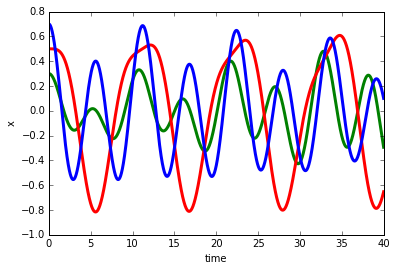

In [21]:
class particle(object):  ## We recycle our 1D particle object
    
    def __init__(self, mass=1., x=0., v=0.):
        self.mass = mass
        self.f = 0
        self.x = x
        self.v = v
        
    def move(self, dt):
        # Euler-Cromer
        self.v = self.v + self.f/self.mass*dt
        self.x = self.x + self.v*dt
        
class CoupledSystem(object):

    def __init__(self, N, k, kc, dt): 
        self.N = N
        self.dt = dt
        self.k = k
        self.kc = kc
        self.particles = [particle()]
        for i in range(1,N):
            self.particles.append(particle()) # we create a list of N particles

    def evolve(self):        
        # Compute the interaction forces with the other particles
        for i in range(self.N-1):
            self.particles[i].f = self.kc*(self.particles[i+1].x + self.particles[i-1].x - 2*self.particles[i].x)
        self.particles[0].f = self.kc*(self.particles[1].x - self.particles[0].x) - self.k*self.particles[0].x
        self.particles[N-1].f = self.kc*(self.particles[N-2].x - self.particles[N-1].x) - self.k*self.particles[N-1].x

        for p in self.particles:
            p.move(dt)
            
    def energy(self):
        # Challenge
        return (ke,pe)

%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.3
S.particles[1].x = 0.5
S.particles[2].x = 0.7

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');

Let's change the initial condition. First we apply $u_1=u_2=u_3=0.5$, then $u_1=-u_2=u_3=0.5$, then $u_1=-u_3=0.5, u_2=0$.

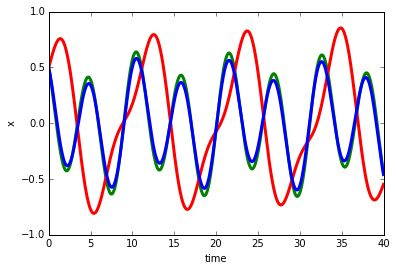

In [24]:
S.particles[0].x = 0.5
S.particles[1].x = 0.5
S.particles[2].x = 0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');

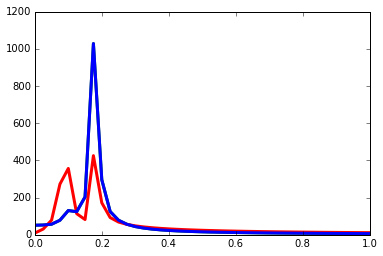

In [29]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)
pyplot.xlim(0,1);

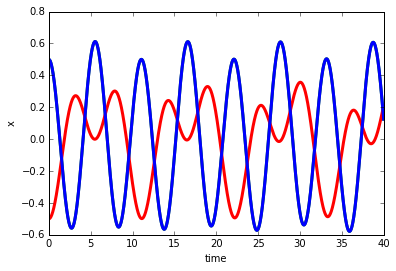

In [31]:
S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.5
S.particles[1].x = -0.5
S.particles[2].x = 0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');

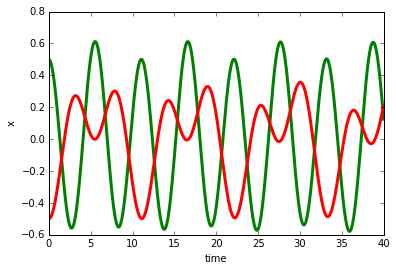

In [32]:
pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
#pyplot.plot(t, x[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');

Here we can see the trajectory of particle 3 overlaps with that of particle 1. 

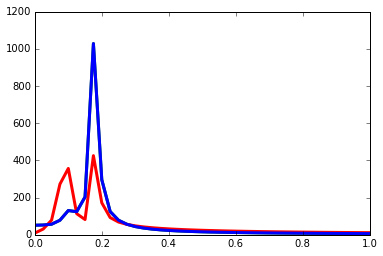

In [33]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)
pyplot.xlim(0,1);

We can see that the normal frequencies of the two normal modes shown above are about 0.1Hz.

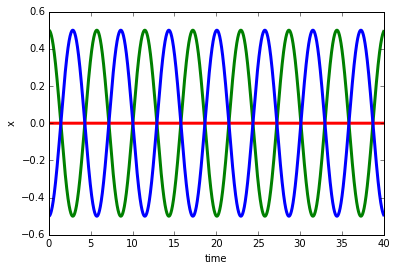

In [34]:
S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.5
S.particles[1].x = 0.
S.particles[2].x = -0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');

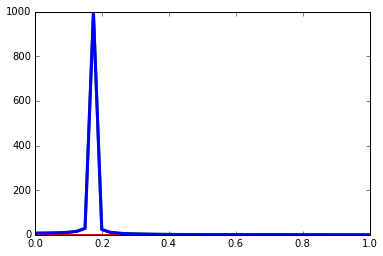

In [35]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)
pyplot.xlim(0,1);

The normal mode frequency of this mode is about 0.2Hz.

Now we start to add a driving force. There should be three resonant frequencies.

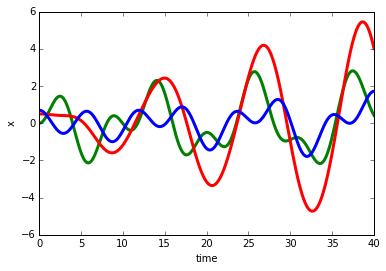

In [58]:
import math

class particle(object):  ## We recycle our 1D particle object
    
    def __init__(self, mass=1., x=0., v=0.):
        self.mass = mass
        self.f = 0
        self.x = x
        self.v = v
        
    def move(self, dt):
        # Euler-Cromer
        self.v = self.v + self.f/self.mass*dt
        self.x = self.x + self.v*dt
        
class CoupledSystem(object):

    def __init__(self, N, k, kc, dt): 
        self.N = N
        self.dt = dt
        self.k = k
        self.kc = kc
        self.particles = [particle()]
        for i in range(1,N):
            self.particles.append(particle()) # we create a list of N particles

    def evolve(self, f0, w, t):        
        self.f0 = f0
        self.w = w
        self.t = t
        # Compute the interaction forces with the other particles
        for i in range(self.N-1):
            self.particles[i].f = self.kc*(self.particles[i+1].x + self.particles[i-1].x - 2*self.particles[i].x)
        self.particles[0].f = self.kc*(self.particles[1].x - self.particles[0].x) - self.k*self.particles[0].x + self.f0*math.cos(self.w*self.t)
        self.particles[N-1].f = self.kc*(self.particles[N-2].x - self.particles[N-1].x) - self.k*self.particles[N-1].x

        for p in self.particles:
            p.move(dt)
            
    def energy(self):
        # Challenge
        return (ke,pe)

%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

f0 = 1.
w = 0.5

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.
S.particles[1].x = 0.5
S.particles[2].x = 0.7

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve(f0, w, t[i])

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');

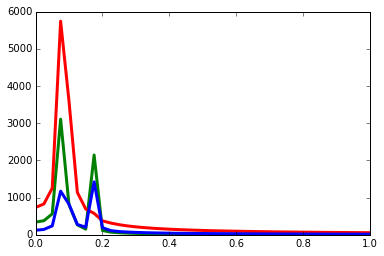

In [59]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)
pyplot.xlim(0,1);

Here we applied Euler's method to simulate the motion of the system. 

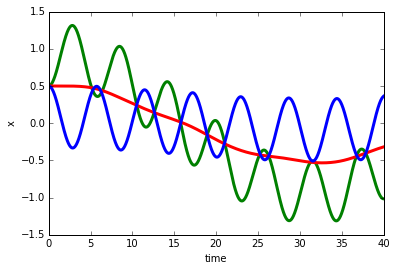

In [9]:
import math

class particle(object):  ## We recycle our 1D particle object
    
    def __init__(self, mass=1., x=0., v=0.):
        self.mass = mass
        self.f = 0
        self.x = x
        self.v = v
        
    def move(self, dt):
        # Euler-Cromer
        self.v = self.v + self.f/self.mass*dt
        self.x = self.x + self.v*dt
        
class CoupledSystem(object):

    def __init__(self, N, k, kc, dt): 
        self.N = N
        self.dt = dt
        self.k = k
        self.kc = kc
        self.particles = [particle()]
        for i in range(1,N):
            self.particles.append(particle()) # we create a list of N particles

    def evolve(self, f0, w, t):        
        self.f0 = f0
        self.w = w
        self.t = t
        # Compute the interaction forces with the other particles
        for i in range(self.N-1):
            self.particles[i].f = self.kc*(self.particles[i+1].x + self.particles[i-1].x - 2*self.particles[i].x)
        self.particles[0].f = self.kc*(self.particles[1].x - self.particles[0].x) - self.k*self.particles[0].x + self.f0*math.cos(self.w*self.t)
        self.particles[N-1].f = self.kc*(self.particles[N-2].x - self.particles[N-1].x) - self.k*self.particles[N-1].x

        for p in self.particles:
            p.move(dt)
            
    def energy(self):
        # Challenge
        return (ke,pe)

%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

f0 = 1.
w = 0.1

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.5
S.particles[1].x = 0.5
S.particles[2].x = 0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve(f0, w, t[i])

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');

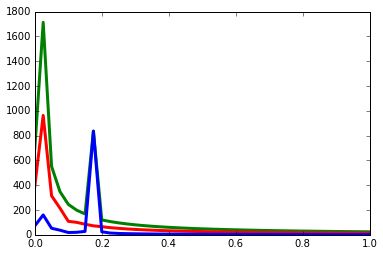

In [10]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)
pyplot.xlim(0,1);

This is the first resonant frequency.

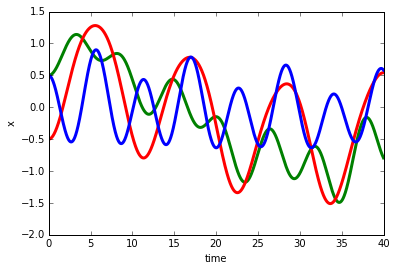

In [14]:
import math

class particle(object):  ## We recycle our 1D particle object
    
    def __init__(self, mass=1., x=0., v=0.):
        self.mass = mass
        self.f = 0
        self.x = x
        self.v = v
        
    def move(self, dt):
        # Euler-Cromer
        self.v = self.v + self.f/self.mass*dt
        self.x = self.x + self.v*dt
        
class CoupledSystem(object):

    def __init__(self, N, k, kc, dt): 
        self.N = N
        self.dt = dt
        self.k = k
        self.kc = kc
        self.particles = [particle()]
        for i in range(1,N):
            self.particles.append(particle()) # we create a list of N particles

    def evolve(self, f0, w, t):        
        self.f0 = f0
        self.w = w
        self.t = t
        # Compute the interaction forces with the other particles
        for i in range(self.N-1):
            self.particles[i].f = self.kc*(self.particles[i+1].x + self.particles[i-1].x - 2*self.particles[i].x)
        self.particles[0].f = self.kc*(self.particles[1].x - self.particles[0].x) - self.k*self.particles[0].x + self.f0*math.cos(self.w*self.t)
        self.particles[N-1].f = self.kc*(self.particles[N-2].x - self.particles[N-1].x) - self.k*self.particles[N-1].x

        for p in self.particles:
            p.move(dt)
            
    def energy(self):
        # Challenge
        return (ke,pe)

%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

f0 = 1.
w = 0.1

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.5
S.particles[1].x = -0.5
S.particles[2].x = 0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve(f0, w, t[i])

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');

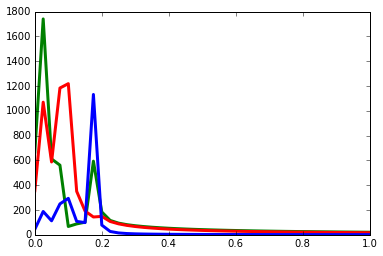

In [15]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)
pyplot.xlim(0,1);

This is the second resonant frequency.

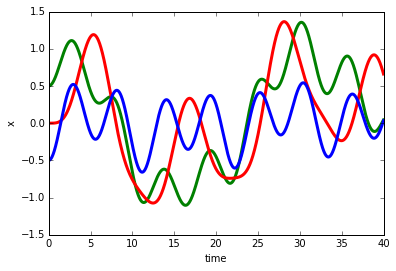

In [11]:
import math

class particle(object):  ## We recycle our 1D particle object
    
    def __init__(self, mass=1., x=0., v=0.):
        self.mass = mass
        self.f = 0
        self.x = x
        self.v = v
        
    def move(self, dt):
        # Euler-Cromer
        self.v = self.v + self.f/self.mass*dt
        self.x = self.x + self.v*dt
        
class CoupledSystem(object):

    def __init__(self, N, k, kc, dt): 
        self.N = N
        self.dt = dt
        self.k = k
        self.kc = kc
        self.particles = [particle()]
        for i in range(1,N):
            self.particles.append(particle()) # we create a list of N particles

    def evolve(self, f0, w, t):        
        self.f0 = f0
        self.w = w
        self.t = t
        # Compute the interaction forces with the other particles
        for i in range(self.N-1):
            self.particles[i].f = self.kc*(self.particles[i+1].x + self.particles[i-1].x - 2*self.particles[i].x)
        self.particles[0].f = self.kc*(self.particles[1].x - self.particles[0].x) - self.k*self.particles[0].x + self.f0*math.cos(self.w*self.t)
        self.particles[N-1].f = self.kc*(self.particles[N-2].x - self.particles[N-1].x) - self.k*self.particles[N-1].x

        for p in self.particles:
            p.move(dt)
            
    def energy(self):
        # Challenge
        return (ke,pe)

%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

f0 = 1.
w = 0.2

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.5
S.particles[1].x = 0.
S.particles[2].x = -0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve(f0, w, t[i])

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');

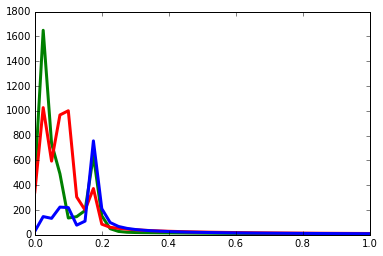

In [12]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)
pyplot.xlim(0,1);

This is the last resonant frequency.

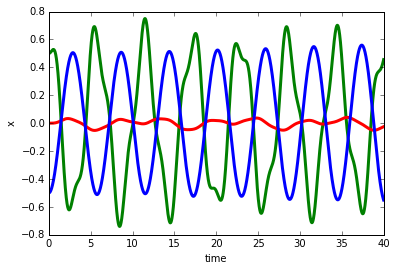

In [5]:
import math

class particle(object):  ## We recycle our 1D particle object
    
    def __init__(self, mass=1., x=0., v=0.):
        self.mass = mass
        self.f = 0
        self.x = x
        self.v = v
        
    def move(self, dt):
        # Euler-Cromer
        self.v = self.v + self.f/self.mass*dt
        self.x = self.x + self.v*dt
        
class CoupledSystem(object):

    def __init__(self, N, k, kc, dt): 
        self.N = N
        self.dt = dt
        self.k = k
        self.kc = kc
        self.particles = [particle()]
        for i in range(1,N):
            self.particles.append(particle()) # we create a list of N particles

    def evolve(self, f0, w, t):        
        self.f0 = f0
        self.w = w
        self.t = t
        # Compute the interaction forces with the other particles
        for i in range(self.N-1):
            self.particles[i].f = self.kc*(self.particles[i+1].x + self.particles[i-1].x - 2*self.particles[i].x)
        self.particles[0].f = self.kc*(self.particles[1].x - self.particles[0].x) - self.k*self.particles[0].x + self.f0*math.cos(self.w*self.t)
        self.particles[N-1].f = self.kc*(self.particles[N-2].x - self.particles[N-1].x) - self.k*self.particles[N-1].x

        for p in self.particles:
            p.move(dt)
            
    def energy(self):
        # Challenge
        return (ke,pe)

%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

f0 = 1.
w = 3.

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.5
S.particles[1].x = 0.
S.particles[2].x = -0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve(f0, w, t[i])

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');

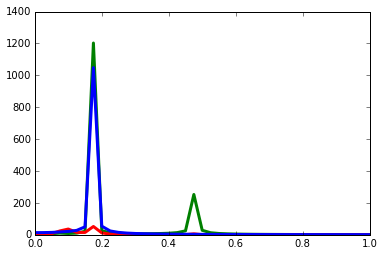

In [6]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)
pyplot.xlim(0,1);

If we set frequency of driving force to 3Hz, we can see clearly it adds a peak at around 0.5Hz compare with the plot we get for the third normal mode when there is no driving force. Also the intermediate particle starts to move compare whereas it stays static when there is no driving force.